In [52]:
Dataset_path="lgg-mri-segmentation/"
Train_path="lgg-mri-segmentation/kaggle_3m/"

In [53]:
import glob
dataset_images=glob.glob(f"{Train_path}**/*.tif")
dataset_images[:5]

['lgg-mri-segmentation/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_1.tif',
 'lgg-mri-segmentation/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_10.tif',
 'lgg-mri-segmentation/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_10_mask.tif',
 'lgg-mri-segmentation/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_11.tif',
 'lgg-mri-segmentation/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_11_mask.tif']

In [57]:
def get_patient_id(image_paths):
    desired_parts_list = [path.split("\\")[1] for path in image_paths]
    return desired_parts_list

def get_sample_number(image_paths):
    sample_numbers = []
    is_mask = []
    
    for path in image_paths:
        path_list = path.split('/')[-2:][1].split('_')

        if 'mask.tif' in path_list:
            sample_numbers.append(int(path_list[-2]))
            is_mask.append(1)
        else:
            sample_numbers.append(int(path_list[-1].replace('.tif', '')))
            is_mask.append(0)
            
    return sample_numbers, is_mask


In [58]:
import pandas as pd
def build_df(image_paths):
    sample_numbers,mask_label=get_sample_number(image_paths)
    
    df=pd.DataFrame({
        'id':sample_numbers,
        'patient':get_patient_id(image_paths),
        'image_path':image_paths,
        'is_mask':mask_label
    })
    
    return df

In [59]:
df = (
    build_df(dataset_images)
    .sort_values(by=['id', 'patient', 'image_path'])
    .reset_index(drop=True)
)

df

,id,patient,image_path,is_mask
0,1,TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,0
1,1,TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,1
2,1,TCGA_CS_4942_19970222,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4942_19...,0
3,1,TCGA_CS_4942_19970222,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4942_19...,1
4,1,TCGA_CS_4943_20000902,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4943_20...,0
...,...,...,...,...
7853,87,TCGA_HT_A61B_19991127,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61B_19...,1
7854,88,TCGA_HT_A61A_20000127,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61A_20...,0
7855,88,TCGA_HT_A61A_20000127,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61A_20...,1
7856,88,TCGA_HT_A61B_19991127,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61B_19...,0


In [60]:
grouped_df = df.groupby(by='is_mask')

images_df, mask_df = (
    grouped_df.get_group(0).drop('is_mask', axis=1).reset_index(drop=True), 
    grouped_df.get_group(1).drop('is_mask', axis=1).reset_index(drop=True)
)
mask_df = mask_df.rename({'image_path': 'mask_path'}, axis=1)

mask_df

,id,patient,mask_path
0,1,TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...
1,1,TCGA_CS_4942_19970222,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4942_19...
2,1,TCGA_CS_4943_20000902,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4943_20...
3,1,TCGA_CS_4944_20010208,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4944_20...
4,1,TCGA_CS_5393_19990606,lgg-mri-segmentation/kaggle_3m\TCGA_CS_5393_19...
...,...,...,...
3924,86,TCGA_HT_A61B_19991127,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61B_19...
3925,87,TCGA_HT_A61A_20000127,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61A_20...
3926,87,TCGA_HT_A61B_19991127,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61B_19...
3927,88,TCGA_HT_A61A_20000127,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61A_20...


In [61]:
images_df

,id,patient,image_path
0,1,TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...
1,1,TCGA_CS_4942_19970222,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4942_19...
2,1,TCGA_CS_4943_20000902,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4943_20...
3,1,TCGA_CS_4944_20010208,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4944_20...
4,1,TCGA_CS_5393_19990606,lgg-mri-segmentation/kaggle_3m\TCGA_CS_5393_19...
...,...,...,...
3924,86,TCGA_HT_A61B_19991127,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61B_19...
3925,87,TCGA_HT_A61A_20000127,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61A_20...
3926,87,TCGA_HT_A61B_19991127,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61B_19...
3927,88,TCGA_HT_A61A_20000127,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61A_20...


In [62]:
import numpy as np
from PIL import Image
def _load(image_path, as_tensor=True):
    image = Image.open(image_path)
    return np.array(image).astype(np.float32) / 255.


def generate_label(mask_path, load_fn):
    mask = load_fn(mask_path)
    if mask.max() > 0:
        return 1 # Brain Tumor Present
    return 0 # Normal

In [64]:
from tqdm import tqdm
ds=pd.merge(images_df,mask_df,on=['id','patient'])
ds

,id,patient,image_path,mask_path
0,1,TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...
1,1,TCGA_CS_4942_19970222,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4942_19...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4942_19...
2,1,TCGA_CS_4943_20000902,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4943_20...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4943_20...
3,1,TCGA_CS_4944_20010208,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4944_20...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4944_20...
4,1,TCGA_CS_5393_19990606,lgg-mri-segmentation/kaggle_3m\TCGA_CS_5393_19...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_5393_19...
...,...,...,...,...
3924,86,TCGA_HT_A61B_19991127,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61B_19...,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61B_19...
3925,87,TCGA_HT_A61A_20000127,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61A_20...,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61A_20...
3926,87,TCGA_HT_A61B_19991127,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61B_19...,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61B_19...
3927,88,TCGA_HT_A61A_20000127,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61A_20...,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61A_20...


In [65]:
ds['diagnosis'] = [generate_label(_, _load) for _ in tqdm(ds['mask_path'])]
ds

100%|██████████| 3929/3929 [00:03<00:00, 1109.09it/s]


,id,patient,image_path,mask_path,diagnosis
0,1,TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,0
1,1,TCGA_CS_4942_19970222,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4942_19...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4942_19...,0
2,1,TCGA_CS_4943_20000902,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4943_20...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4943_20...,0
3,1,TCGA_CS_4944_20010208,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4944_20...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4944_20...,0
4,1,TCGA_CS_5393_19990606,lgg-mri-segmentation/kaggle_3m\TCGA_CS_5393_19...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_5393_19...,0
...,...,...,...,...,...
3924,86,TCGA_HT_A61B_19991127,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61B_19...,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61B_19...,0
3925,87,TCGA_HT_A61A_20000127,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61A_20...,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61A_20...,0
3926,87,TCGA_HT_A61B_19991127,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61B_19...,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61B_19...,0
3927,88,TCGA_HT_A61A_20000127,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61A_20...,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61A_20...,0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


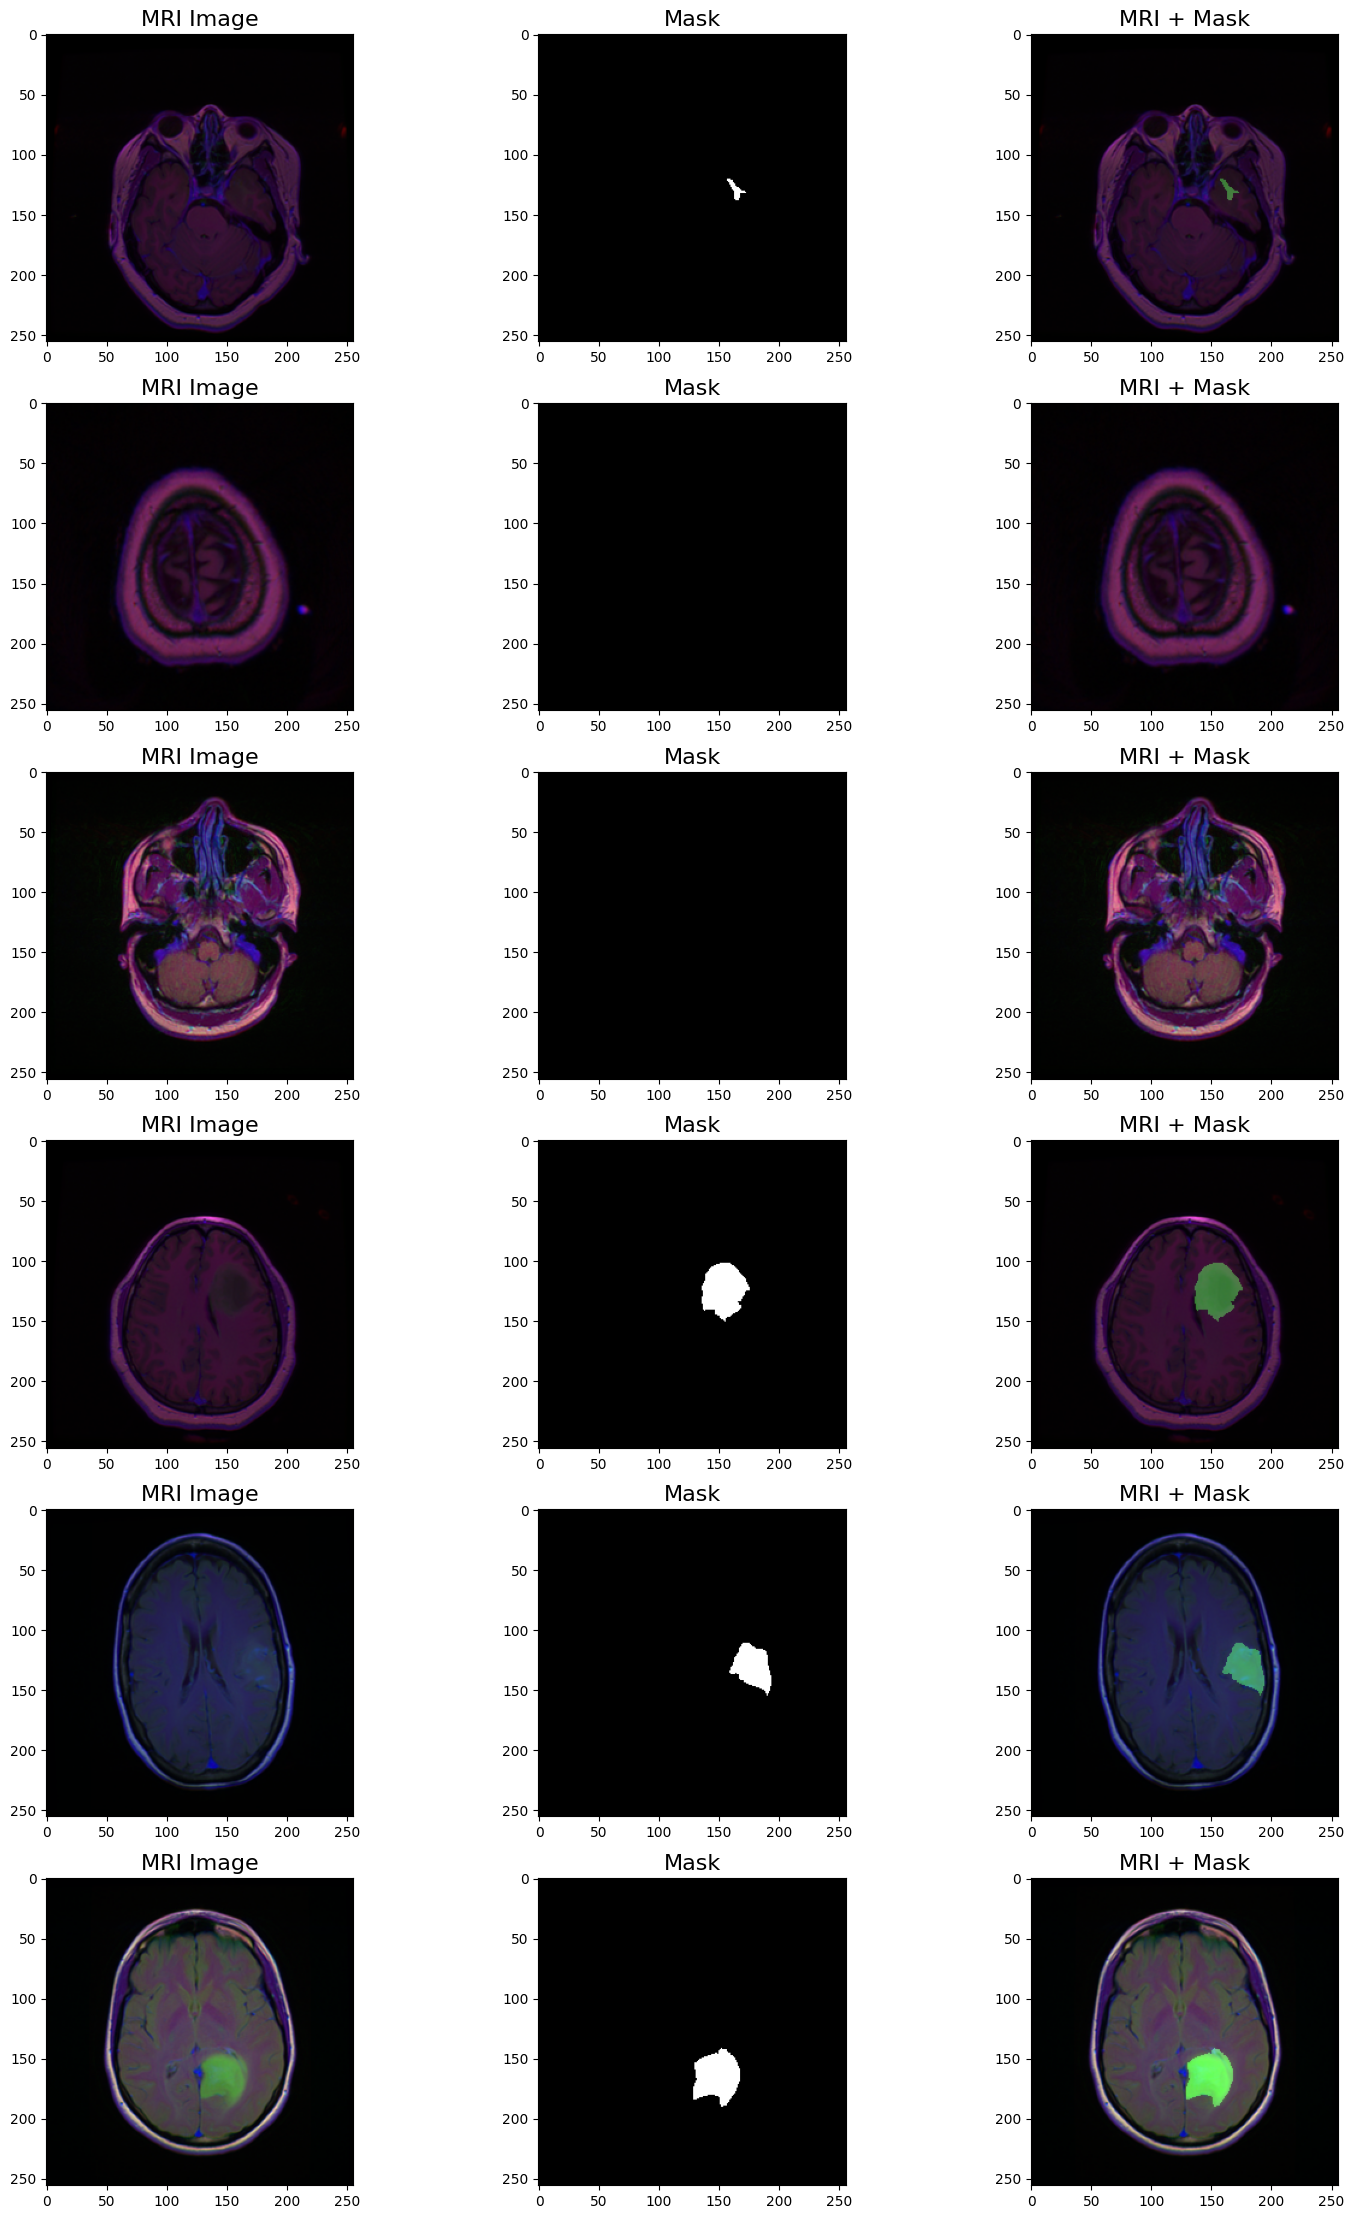

In [67]:
import random
import matplotlib.pyplot as plt
def view_mulitiple_samples(df, sample_loader, count=10, color_map='rgb', fig_size=(14, 10), title_size=16):
    idx = random.sample(df.index.to_list(), count)
    
    fig = plt.figure(figsize=fig_size)
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)

    for row, _ in enumerate(idx):
        image, mask = (
            sample_loader(df.image_path[_]),
            sample_loader(df.mask_path[_])
        )
        
        idx = 3 * (row + 1)
        plt.subplot(count+1, 3, idx + 1)
        plt.title(f'MRI Image', fontsize=title_size)
        if color_map=='rgb':
            plt.imshow(image)
        else:
            plt.imshow(image, cmap=color_map)
        plt.subplot(count+1, 3, idx + 2)
        plt.title(f'Mask', fontsize=title_size)
        plt.imshow(mask, cmap='gray')

        plt.subplot(count+1, 3, idx + 3)
        gen_mask = np.dstack([mask*0.1, mask*0.4, mask*0.1])
        plt.title(f'MRI + Mask', fontsize=title_size)
        if color_map=='rgb':
            plt.imshow(image + gen_mask)
        else:
            plt.imshow(image + gen_mask, cmap=color_map)

    return

view_mulitiple_samples(
    ds, _load, 
    count=6, 
    fig_size=(18, 30)
)


In [69]:
from sklearn.model_selection import train_test_split
train_split_idx,val_test_split_idx,_,_=(
    train_test_split(ds.index,ds.diagnosis,test_size=0.3,stratify=ds.diagnosis)
)

train_df = ds.iloc[train_split_idx].reset_index(drop=True)
val_test_df = ds.iloc[val_test_split_idx].reset_index(drop=True)

train_df.shape, val_test_df.shape


((2750, 5), (1179, 5))

In [70]:
val_split_idx, test_split_idx, _, _ = (
    train_test_split(
        val_test_df.index, 
        val_test_df.diagnosis, 
        test_size=0.65,
        stratify=val_test_df.diagnosis,
    )
)

# Get training and remaining data
val_df = val_test_df.iloc[val_split_idx].reset_index(drop=True)
test_df = val_test_df.iloc[test_split_idx].reset_index(drop=True)

# View shapes
val_df.shape, test_df.shape

((412, 5), (767, 5))

In [71]:
train_df.to_csv('train_data.csv', index=False)
val_df.to_csv('val_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

In [1]:
import pandas as pd
train_df=pd.read_csv('train_data.csv')
train_df

,id,patient,image_path,mask_path,diagnosis
0,21,TCGA_DU_A5TW_19980228,lgg-mri-segmentation/kaggle_3m\TCGA_DU_A5TW_19...,lgg-mri-segmentation/kaggle_3m\TCGA_DU_A5TW_19...,1
1,5,TCGA_DU_5855_19951217,lgg-mri-segmentation/kaggle_3m\TCGA_DU_5855_19...,lgg-mri-segmentation/kaggle_3m\TCGA_DU_5855_19...,0
2,50,TCGA_FG_6690_20020226,lgg-mri-segmentation/kaggle_3m\TCGA_FG_6690_20...,lgg-mri-segmentation/kaggle_3m\TCGA_FG_6690_20...,0
3,5,TCGA_DU_8168_19970503,lgg-mri-segmentation/kaggle_3m\TCGA_DU_8168_19...,lgg-mri-segmentation/kaggle_3m\TCGA_DU_8168_19...,0
4,46,TCGA_HT_A61A_20000127,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61A_20...,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61A_20...,1
...,...,...,...,...,...
2745,17,TCGA_FG_7643_20021104,lgg-mri-segmentation/kaggle_3m\TCGA_FG_7643_20...,lgg-mri-segmentation/kaggle_3m\TCGA_FG_7643_20...,0
2746,33,TCGA_DU_8166_19970322,lgg-mri-segmentation/kaggle_3m\TCGA_DU_8166_19...,lgg-mri-segmentation/kaggle_3m\TCGA_DU_8166_19...,0
2747,38,TCGA_FG_A4MT_20020212,lgg-mri-segmentation/kaggle_3m\TCGA_FG_A4MT_20...,lgg-mri-segmentation/kaggle_3m\TCGA_FG_A4MT_20...,0
2748,23,TCGA_DU_5853_19950823,lgg-mri-segmentation/kaggle_3m\TCGA_DU_5853_19...,lgg-mri-segmentation/kaggle_3m\TCGA_DU_5853_19...,0
